# Supervised Learning II

## Linear Regression

Supervised Learning은 실생활에서 많은 분야에서 사용되고 있음. 
linear regression은 예측 변수와 결과 사이의 선형 관계를 사용하여 결과를 예측하는 model. line과 data 사이의 오류(차이)를 최소로 하는 line을 찾음. line을 찾는 과정이기 때문에 쉽게 모델을 학습하고 해석 할 수 있음. 하지만, 단순함으로 인해 실제 데이터를 잘 표현하지 못하기도 함. 
logistic regression은 데이터가 어떤 범주에 속할 확률 (0~1)을 예측하는 model. 
확률이 높은 범주로 분류함. 

KNN은 새로운 데이터가 주어지면 기존의 k개의 이웃을 보고 새로운 데이터의 범주를 결정함. k의 값에 따라 모델의 성능이 결정됨. 이상치는 없고 연구자자 임의로 설정해야 하는 단점이 있고, k의 개의 이웃과 모두 거리를 측정해야해서 시간이 오래 걸림. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split #모델 생성시 data selection 및 training에 이용
from sklearn.linear_model import LinearRegression # Linear Regression을 이용 모델 생성
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('data/wrangled_transaction_data_result.csv')
df.head(100)

,CustomerID,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
0,12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
1,12348.0,892.80,14.0,14.0,1.0,892.80,904.44
2,12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
3,12383.0,600.72,8.0,8.0,1.0,600.72,1249.84
4,12386.0,258.90,22.0,22.0,1.0,258.90,143.00
...,...,...,...,...,...,...,...
95,13199.0,711.80,22.0,14.0,2.0,355.90,9105.32
96,13209.0,318.85,17.0,17.0,1.0,318.85,5572.76
97,13211.0,110.70,17.0,17.0,1.0,110.70,1086.72
98,13221.0,498.16,15.0,15.0,1.0,498.16,349.25


In [8]:
df.shape

(701, 7)

In [10]:
df.corr()

,CustomerID,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,1.000000,-0.163863,0.059482,0.031572,0.041040,-0.187935,-0.130947
2010 revenue,-0.163863,1.000000,0.066457,-0.232909,0.391289,0.824157,0.501419
days_since_first_purchase,0.059482,0.066457,1.000000,0.671288,0.321882,-0.129184,0.014265
days_since_last_purchase,0.031572,-0.232909,0.671288,1.000000,-0.379786,-0.044253,-0.157671
number_of_purchases,0.041040,0.391289,0.321882,-0.379786,1.000000,-0.115829,0.275461
avg_order_cost,-0.187935,0.824157,-0.129184,-0.044253,-0.115829,1.000000,0.355010
2011 revenue,-0.130947,0.501419,0.014265,-0.157671,0.275461,0.355010,1.000000


In [11]:
X = df[['2010 revenue',
       'days_since_last_purchase',
       'number_of_purchases',
       'avg_order_cost'
       ]]
y = df['2011 revenue']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
X.mean()

2010 revenue                424.086976
days_since_last_purchase     19.138374
number_of_purchases           1.289586
avg_order_cost              343.248718
dtype: float64

In [17]:
X.median()

2010 revenue                323.620
days_since_last_purchase     20.000
number_of_purchases           1.000
avg_order_cost              295.075
dtype: float64

In [20]:
model.coef_

array([  4.7826496 ,   3.28568324, 210.91265074,  -1.09186392])

In [22]:
model.intercept_

379.9435546401073

In [23]:
single_customer = pd.DataFrame({
    '2010 revenue': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

In [24]:
model.predict(single_customer)

array([5104.20016637])

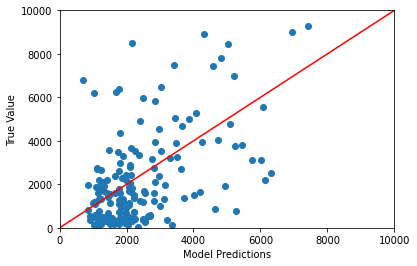

In [25]:
plt.scatter(model.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [26]:
pearsonr(model.predict(X_test),y_test)

(0.4781517003931423, 1.929377317972386e-11)

## Rogistic Regression

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

ImportError: cannot import name 'Linear_model' from 'sklearn' (/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/__init__.py)

In [56]:
data = pd.read_csv('data/exam_score_data.csv', header=None)
data.head(100)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[[2]].astype(int), test_size=0.3, random_state=1, stratify=data[[2]].astype(int))

In [62]:
print(X_train[:10],'\n\n' , y_train[:10])

            0          1
59  71.796462  78.453562
52  90.546714  43.390602
67  49.072563  51.883212
54  50.286496  49.804539
43  82.368754  40.618255
78  60.455556  42.508409
49  91.564974  88.696293
36  33.915500  98.869436
25  62.271014  69.954458
55  49.586677  59.808951 

     2
59  1
52  1
67  0
54  0
43  0
78  0
49  1
36  0
25  1
55  0


In [37]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
LinearRegression(copy_X = True, fit_intercept = True, n_jobs=None, normalize=False)

LinearRegression()

In [38]:
linear.predict(X_test)

array([[ 1.22083091],
       [ 1.17230948],
       [ 0.94507443],
       [ 0.35609403],
       [ 1.02375539],
       [ 0.8016655 ],
       [ 1.09434499],
       [ 1.05191921],
       [ 0.27273707],
       [ 0.40180325],
       [ 0.84618988],
       [ 1.06105956],
       [ 1.06873208],
       [ 0.35054279],
       [ 1.19900775],
       [ 0.51962942],
       [ 0.16641549],
       [ 1.01137892],
       [ 0.30865603],
       [ 0.30361639],
       [ 0.67983531],
       [-0.20582051],
       [ 0.34259952],
       [ 0.45063479],
       [ 0.74903637],
       [ 0.29760594],
       [ 0.43242695],
       [ 0.97129797],
       [ 0.50748505],
       [ 0.98267487]])

In [39]:
y_test[2].values.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

In [40]:
color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]
marker = ['o', 'v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

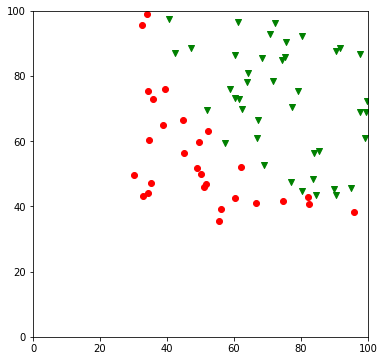

In [67]:
plt.figure(figsize=(6,6))
for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x, _y, c=c, marker=_m)
    plt.xlim(0,100)
    plt.ylim(0,100)

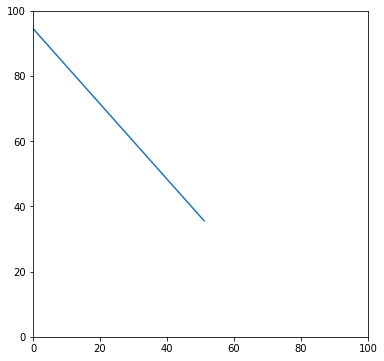

In [69]:
plt.figure(figsize=(6,6))
plt.plot((- linear.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - linear.intercept_[0]) / 
         linear.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [46]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train[2].values.astype(int))

LogisticRegression()

In [48]:
logit.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1])

In [49]:
y_test[2].values.astype(int)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

In [66]:
logit.intercept_[0]

-25.020783070324946

In [51]:
color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]
marker = ['o', 'v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

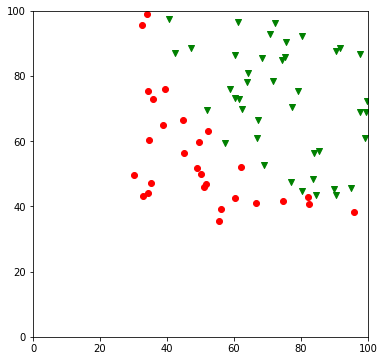

In [71]:
plt.figure(figsize=(6,6))
for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x, _y, c=c, marker=_m)
    plt.xlim(0,100)
    plt.ylim(0,100)

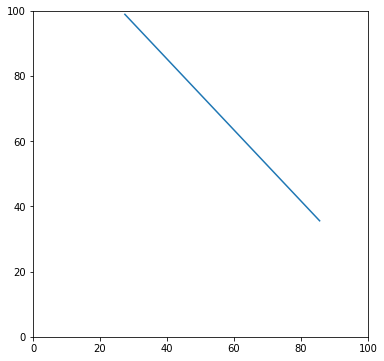

In [70]:
plt.figure(figsize=(6,6))
plt.plot((- logit.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - logit.intercept_[0]) / 
         logit.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

## KNN

In [94]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # parameter tunning 

In [75]:
glass_data = pd.read_csv('data/glass_class_data.csv')
glass_data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [76]:
glass_data.shape

(214, 10)

In [79]:
x = glass_data.drop("Type", axis=1)
y = glass_data['Type']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)

In [83]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_predict = knn.predict(x_test)

In [123]:
y_test_cnt = [0 for i in range(8)]
for i in y_test:
    y_test_cnt[i] += 1
y_test_cnt[1:]

[23, 25, 2, 0, 2, 3, 10]

In [95]:
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix
# type 1 은 총 23개 그중 18개는 1로 분류, 2개는 2, 3개는 3으로 분류됨 

array([[18,  2,  3,  0,  0,  0],
       [ 6, 15,  1,  1,  2,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  9]])

In [96]:
accuracy_score(y_test, y_predict)

0.6923076923076923

In [97]:
c_list = list(range(1,50))

In [98]:
cv_score = []

In [99]:
for k in c_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cv_score.append(scores.mean())

/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Pyt

/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/barunpuri/Library/Pyt

In [100]:
MSE = [1-x for x in cv_score]

In [125]:
opt_k = c_list[MSE.index(min(MSE))]
print('the optimal neighbors number is {}'.format(opt_k))
print('the optimal ERROR is {}'.format(min(MSE)))

the optimal neighbors number is 1
the optimal ERROR is 0.26857142857142857


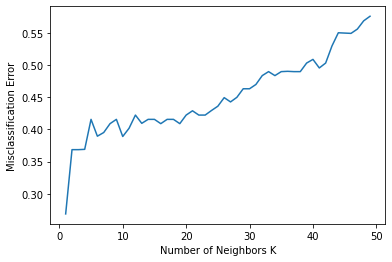

In [104]:
plt.plot(c_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()